<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [91]:
# Imports
import pandas as pd
import gensim
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

In [8]:
# Import data
path = '../module1-text-data/data/'
df = pd.read_csv(path + "/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

In [12]:
# Clean brand column
df['brand'] = df['brand'].apply(lambda x: x.lower())

amazon          16153
amazonbasics    12179
Name: brand, dtype: int64

In [15]:
df.shape

(28332, 24)

In [27]:
# Narrow dataframe
electronics = df[df['primaryCategories'] == 'Electronics'].reset_index(drop=True)

In [28]:
electronics.head(1)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...


In [34]:
# Add 'amazon' as custom stopword
STOPWORDS = STOPWORDS.union(['amazon'])

In [46]:
# Define tokenize function
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [47]:
# Create token column
electronics['tokens'] = [tokenize(review) for review in electronics['reviews.text']]

In [48]:
# Check df
electronics.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
0,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[great, case, place, husband, love, holds, lot..."
1,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[discarding, getting, rid, broken, cd, cases, ..."
2,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[dollars, boycotting]"
3,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,2,http://www.amazon.co.uk/gp/product-reviews/B00...,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[initial, impression, good, material, nicer, s..."
4,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",...,NaN,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,https://www.newegg.com/Product/Product.aspx?It...,"[pros, standard, echo, cons, older, generation..."


In [70]:
# Create dictionary representation of all words in corpus
id2word = corpora.Dictionary(electronics['tokens'])

In [71]:
len(id2word.keys())

7011

In [74]:
# Filter out extremes
id2word.filter_extremes(no_below=5, no_above=0.95)

In [75]:
len(id2word.keys())

2612

In [84]:
# Create bag of words representation of corpus
corpus = [id2word.doc2bow(text) for text in electronics['tokens']]

In [82]:
# Define coherence values computation
def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics.
    """
    coherence_values = []
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model, dictionary=dictionary, corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_,
                                    'num_topics': num_topics,
                                    'coherence_score': coherencemodel.get_coherence()
                                    })
    return coherence_values

In [85]:
# Determine best number of topics to use
coherence_values = compute_coherence_values(dictionary=id2word,
                                           corpus=corpus,
                                           limit=30)

In [87]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

/Users/loris/opt/anaconda3/envs/U4-Sl-NLP/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


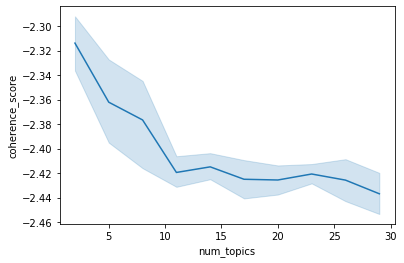

In [88]:
# Visualize coherence scores
import seaborn as sns

ax = sns.lineplot(x='num_topics', y='coherence_score', data=topic_coherence)

In [89]:
# Create LDA multicore
lda = LdaMulticore(corpus=corpus,
                  id2word=id2word,
                  random_state=7,
                  num_topics=5,
                  passes=10,
                  workers=4)

In [92]:
# Clean up topics to make printable
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics):
    print(f"----Topic {id}------")
    print(t, end="\n\n")

----Topic 0------
loves bought old use easy

----Topic 1------
kids tablet great apps love

----Topic 2------
great price tablet good use

----Topic 3------
kindle great love easy screen

----Topic 4------
tablet good apps great price



In [93]:
# Interpret LDA Results
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/loris/opt/anaconda3/envs/U4-Sl-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.036385  0.098335       1        1  24.651011
4      0.085763 -0.062789       2        1  20.921955
2      0.109981  0.058166       3        1  18.672348
1     -0.034946 -0.142191       4        1  17.925484
0     -0.197183  0.048479       5        1  17.829203, topic_info=     Category         Freq           Term        Total  loglift  logprob
791   Default  1736.000000          loves  1736.000000  30.0000  30.0000
1048  Default  1745.000000           kids  1745.000000  29.0000  29.0000
79    Default  1660.000000            old  1660.000000  28.0000  28.0000
104   Default  1290.000000           year  1290.000000  27.0000  27.0000
86    Default  2039.000000          price  2039.000000  26.0000  26.0000
622   Default  2287.000000         bought  2287.000000  25.0000  25.0000
60    Default  2340.000000           easy  2340.000000  24.0000  24.0000
759   Default  2310.000000         kindle  2310.000000  23.0000  23.0000
687   Default   865.000000           gift   865.000000  22.0000  22.0000
685   Default   666.000000      christmas   666.000000  21.0000  21.0000
5     Default  2474.000000           love  2474.000000  20.0000  20.0000
1178  Default   739.000000       daughter   739.000000  19.0000  19.0000
422   Default   728.000000            son   728.000000  18.0000  18.0000
194   Default  1541.000000           apps  1541.000000  17.0000  17.0000
1     Default  4995.000000          great  4995.000000  16.0000  16.0000
66    Default  2417.000000           good  2417.000000  15.0000  15.0000
536   Default  5977.000000         tablet  5977.000000  14.0000  14.0000
214   Default  3062.000000            use  3062.000000  13.0000  13.0000
664   Default   914.000000           read   914.000000  12.0000  12.0000
241   Default   593.000000        quality   593.000000  11.0000  11.0000
122   Default   351.000000          sound   351.000000  10.0000  10.0000
1983  Default   321.000000       parental   321.000000   9.0000   9.0000
906   Default   960.000000        reading   960.000000   8.0000   8.0000
1186  Default   443.000000         google   443.000000   7.0000   7.0000
138   Default  1369.000000         screen  1369.000000   6.0000   6.0000
123   Default   300.000000          alexa   300.000000   5.0000   5.0000
35    Default   539.000000          store   539.000000   4.0000   4.0000
1025  Default   244.000000            tap   244.000000   3.0000   3.0000
1146  Default   315.000000  granddaughter   315.000000   2.0000   2.0000
108   Default   233.000000           echo   233.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
1178   Topic5   590.988647       daughter   739.147888   1.5006  -3.9689
1181   Topic5   210.254791             yr   259.600983   1.5135  -5.0024
422    Topic5   565.228516            son   728.753906   1.4702  -4.0135
687    Topic5   659.593811           gift   865.391113   1.4528  -3.8591
339    Topic5    47.360538        brought    56.407509   1.5495  -6.4929
79     Topic5  1212.879883            old  1660.923340   1.4100  -3.2500
1642   Topic5   294.425262       grandson   384.768311   1.4567  -4.6657
104    Topic5   925.313110           year  1290.724609   1.3915  -3.5206
1073   Topic5   112.364960      grandkids   141.884827   1.4911  -5.6290
880    Topic5   158.688171     absolutely   206.053452   1.4631  -5.2838
587    Topic5   200.101242           uses   269.448669   1.4268  -5.0519
1054   Topic5    92.784775          grand   118.176575   1.4824  -5.8204
3      Topic5   100.720032        husband   129.969345   1.4694  -5.7384
622    Topic5  1277.777954         bought  2287.873535   1.1418  -3.1978
1069   Topic5   100.167946          plays   132.755386   1.4427  -5.7439
60     Topic5  1061.850708           easy  2340.479004   0.9340  -3.3830
398    Topic5   164.063858        durable   252.542847   1.2930  -5.2505
21

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling